<h1> UK ROAD ACCIDENT DATA ANALYSIS<h1>
<h1>INCLUSIVE YEAR 2019 - 2022</h1>
<h1>Analyst: Jhon Lester Andal</h1>
<h3>DATA PREPARATION</h3>
<h4>Transfer Data to set Folder</h4>
<h3>Importinmg Libraries</h3>

In [1]:
pip install

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Python310\python.exe -m pip install --upgrade pip
ERROR: You must give at least one requirement to install (see "pip help install")


In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

<h1>DATA FRAME</h1>

In [3]:
accident = pd.read_csv('datasets//')

In [4]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [5]:
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [6]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mean())

In [7]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                       0
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [8]:
accident[''] = accident['Longitude'].fillna(accident['Longitude'].mean())

In [9]:
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mean())

In [10]:
accident['Road_Type'] = accident['Road_Type'].fillna(accident['Road_Type'].mode()[0])
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna(accident['Weather_Conditions'].mode()[0])

In [11]:
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna(accident['Road_Surface_Conditions'].mode()[0])

In [12]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
                           0
dtype: int64

In [13]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660679 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660679 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  660679 non-null  object 
 10  Road_Type                660679 non-null  object 
 11  Urban_or_Rural_Area      660679 non-null  object 
 12  Weather_Conditions       660679 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
 14      

In [14]:
accident['Accident Date'] = accident['Accident Date'].astype('str')
accident.dtypes
accident['Accident Date'] = accident['Accident Date'].str.strip()
accident['Accident Date'] = accident['Accident Date'].str.replace('/', '-')

In [15]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
                           0
dtype: int64

In [16]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')

In [17]:
accident.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
                                  float64
dtype: object

In [18]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
                           0
dtype: int64

In [19]:
#accident[''] = accident[''].fillna(accident[''].mean())

In [20]:
accident['Index'] = accident['Index'].astype('category')
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['District Area'] = accident['District Area'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')

In [21]:
accident.dtypes

Index                            category
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
                                  float64
dtype: object

In [22]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  category      
 1   Accident_Severity        660679 non-null  category      
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  float64       
 4   Light_Conditions         660679 non-null  category      
 5   District Area            660679 non-null  category      
 6   Longitude                660679 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  category      
 10  Road_Type                660679 non-null  category      
 11  Urban_or_Rural_Area      660679 non-null  category      
 12  Weather_Conditio

In [23]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
                           0
dtype: int64

In [24]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek

In [25]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,,Year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,-0.209082,2019,6,5,2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,-0.173647,2019,7,2,1
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,-0.210215,2019,8,26,0
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),-0.202731,2019,8,16,4
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,Single carriageway,Urban,Fine no high winds,Other vehicle,-0.192487,2019,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,-3.467828,2022,2,18,4
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,-3.809281,2022,2,21,0
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,-3.862727,2022,2,23,2
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,-3.823997,2022,2,23,2


In [26]:
 acci_19 = accident[accident['Year'] == 2019]

In [27]:
acci_19

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,,Year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,-0.209082,2019,6,5,2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,-0.173647,2019,7,2,1
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,-0.210215,2019,8,26,0
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),-0.202731,2019,8,16,4
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,Single carriageway,Urban,Fine no high winds,Other vehicle,-0.192487,2019,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182110,2.01E+12,Slight,2019-12-20,54.985289,Darkness - no lighting,Dumfries and Galloway,-3.210294,1,1,Frost or ice,Single carriageway,Rural,Other,Car,-3.210294,2019,12,20,4
182111,2.01E+12,Serious,2019-12-21,54.984105,Daylight,Dumfries and Galloway,-3.193693,2,1,Frost or ice,Single carriageway,Rural,Other,Car,-3.193693,2019,12,21,5
182112,2.01E+12,Slight,2019-12-23,55.166369,Darkness - no lighting,Dumfries and Galloway,-2.992068,1,1,Frost or ice,Single carriageway,Rural,Fog or mist,Van / Goods 3.5 tonnes mgw or under,-2.992068,2019,12,23,0
182113,2.01E+12,Slight,2019-12-23,54.995154,Darkness - lights lit,Dumfries and Galloway,-3.058338,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,-3.058338,2019,12,23,0


In [28]:
acci_19['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       133042
Darkness - lights lit           35769
Darkness - no lighting          10842
Darkness - lighting unknown      1768
Darkness - lights unlit           694
Name: count, dtype: int64

In [29]:
acci_19['Light_Conditions'].value_counts().sum()

182115

<h1>Insight 1</h1>
<h3> The accident mostly happen in dayligth which is 73.05%.</h3>

Text(0.5, 1.0, 'light condion and the number of accident')

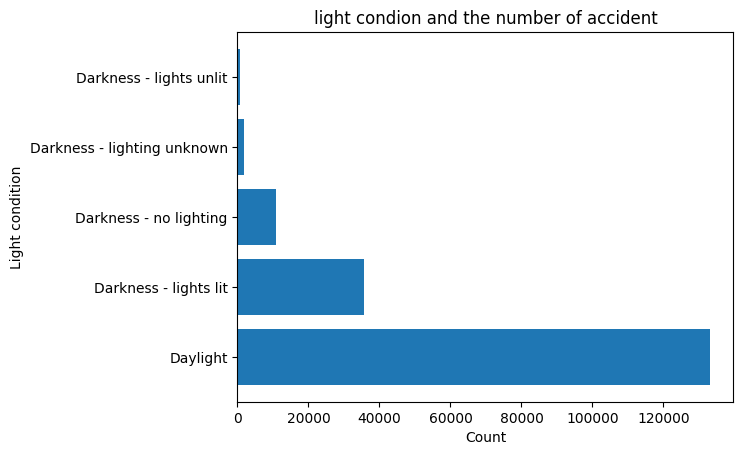

In [30]:
light_19 = acci_19['Light_Conditions'].value_counts()

plt.barh(light_19.index, light_19.values)
plt.ylabel('Light condition')
plt.xlabel('Count')
plt.title('light condion and the number of accident')


In [31]:
acci_19['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       148010
Raining no high winds     22835
Other                      4083
Raining + high winds       2959
Fine + high winds          2545
Fog or mist                 857
Snowing no high winds       680
Snowing + high winds        146
Name: count, dtype: int64

In [32]:
acci_19['Weather_Conditions'].value_counts().sum()

182115

<h1>Insight 2</h1>
<h3>In the record in fine no high winds weather codition have the most accident happen with 81%</h3>

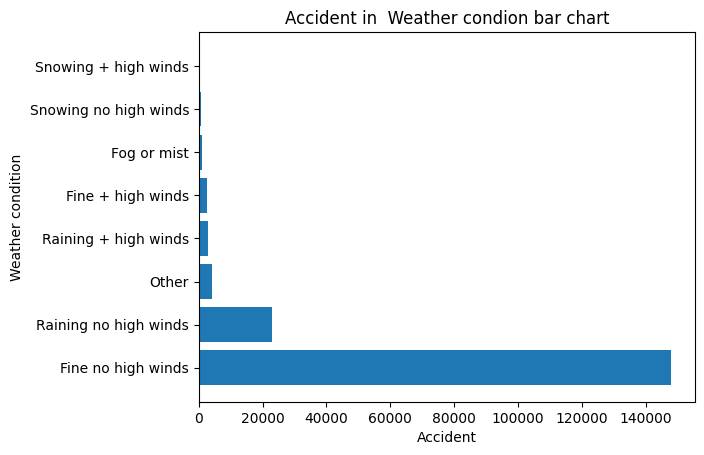

In [33]:
weather_19 = acci_19['Weather_Conditions'].value_counts()

plt.barh(weather_19.index, weather_19.values)
plt.ylabel('Weather condition')
plt.xlabel('Accident')
plt.title('Accident in  Weather condion bar chart')

plt.show()

In [34]:
casualty_19 = acci_19.groupby(['Weather_Conditions','Vehicle_Type'])['Number_of_Casualties'].count()

C:\Users\RIZEN\AppData\Local\Temp\ipykernel_6936\1707058125.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  casualty_19 = acci_19.groupby(['Weather_Conditions','Vehicle_Type'])['Number_of_Casualties'].count()


In [35]:
casualty_19

Weather_Conditions     Vehicle_Type                        
Fine + high winds      Agricultural vehicle                       6
                       Bus or coach (17 or more pass seats)     157
                       Car                                     1817
                       Data missing or out of range               0
                       Goods 7.5 tonnes mgw and over             96
                                                               ... 
Snowing no high winds  Other vehicle                              2
                       Pedal cycle                                0
                       Ridden horse                               0
                       Taxi/Private hire car                     20
                       Van / Goods 3.5 tonnes mgw or under       24
Name: Number_of_Casualties, Length: 128, dtype: int64

In [36]:
df_exam3 = acci_19[acci_19['Weather_Conditions'] == 'Fine no high winds']

In [37]:
df_exam4 = df_exam3.groupby(['Vehicle_Type', 'Urban_or_Rural_Area'])['Number_of_Casualties'].size()

C:\Users\RIZEN\AppData\Local\Temp\ipykernel_6936\3172274190.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_exam4 = df_exam3.groupby(['Vehicle_Type', 'Urban_or_Rural_Area'])['Number_of_Casualties'].size()


In [38]:
df_exam4.unstack()

Urban_or_Rural_Area,Rural,Unallocated,Urban
Vehicle_Type,,,
Agricultural vehicle,177,0,323
Bus or coach (17 or more pass seats),2870,1,5682
Car,38468,1,67412
Data missing or out of range,0,0,0
Goods 7.5 tonnes mgw and over,1819,0,3230
Goods over 3.5t. and under 7.5t,631,0,1062
Minibus (8 - 16 passenger seats),168,0,334
Motorcycle 125cc and under,1112,0,2421
Motorcycle 50cc and under,603,0,1121


In [39]:
df_exam3['Number_of_Casualties'].sum()
#total Number_of_Casualties in the weather 'fine with no winds' in 2019

199634

In [40]:

df_exam3.groupby('Urban_or_Rural_Area')['Number_of_Casualties'].sum()


C:\Users\RIZEN\AppData\Local\Temp\ipykernel_6936\3245866668.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_exam3.groupby('Urban_or_Rural_Area')['Number_of_Casualties'].sum()


Urban_or_Rural_Area
Rural           78338
Unallocated         2
Urban          121294
Name: Number_of_Casualties, dtype: int64

<h1>Insight 3</h1>
<h3>total Number_of_Casualties in the weather 'fine with no winds' in urban areas in 2019 in 121294 or 60.75%</h3>

C:\Users\RIZEN\AppData\Local\Temp\ipykernel_6936\4176092495.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_exam4 = df_exam3.groupby(['Urban_or_Rural_Area'])['Number_of_Casualties'].sum()


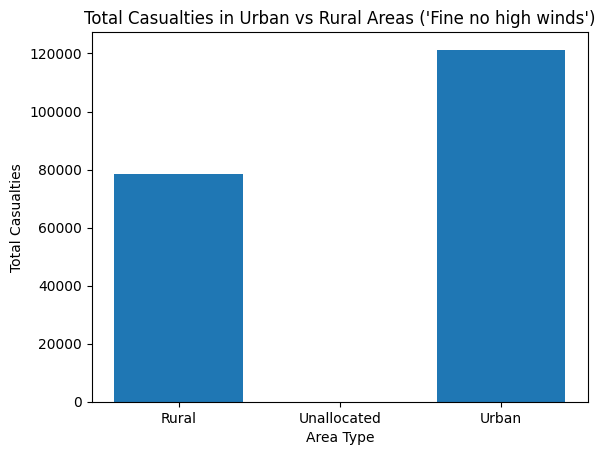

In [41]:
df_exam4 = df_exam3.groupby(['Urban_or_Rural_Area'])['Number_of_Casualties'].sum()

plt.bar(df_exam4.index, df_exam4.values)

plt.xlabel("Area Type")
plt.ylabel("Total Casualties")
plt.title("Total Casualties in Urban vs Rural Areas ('Fine no high winds')")

plt.show()

<h1>Insight 4</h1>
<h3>total Number_of_Casualties in the weather 'fine with no winds' in urban areas in 2019 in 78338 or 39.24%</h3>

C:\Users\RIZEN\AppData\Local\Temp\ipykernel_6936\4176092495.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_exam4 = df_exam3.groupby(['Urban_or_Rural_Area'])['Number_of_Casualties'].sum()


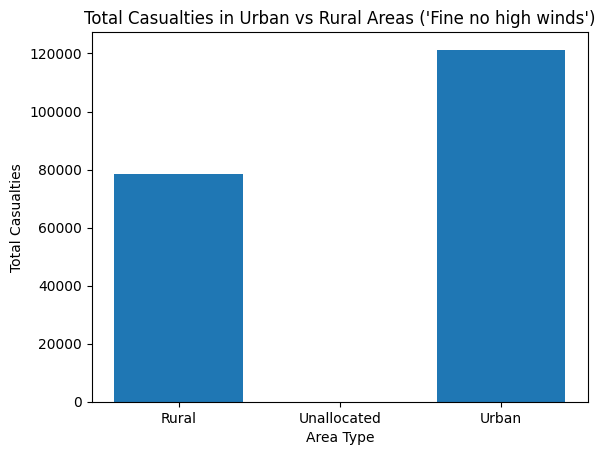

In [42]:
df_exam4 = df_exam3.groupby(['Urban_or_Rural_Area'])['Number_of_Casualties'].sum()

plt.bar(df_exam4.index, df_exam4.values)

plt.xlabel("Area Type")
plt.ylabel("Total Casualties")
plt.title("Total Casualties in Urban vs Rural Areas ('Fine no high winds')")

plt.show()

<h1>Insight 5</h1>
<h3>the vehicle involve the most in accidents in the weather 'fine with no winds' in urban areas in 2019 is Car with 70% or 67412 involvement </h3>

C:\Users\RIZEN\AppData\Local\Temp\ipykernel_6936\3962279449.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  urban_vehi = df_urban19.groupby('Vehicle_Type')['Number_of_Casualties'].sum()


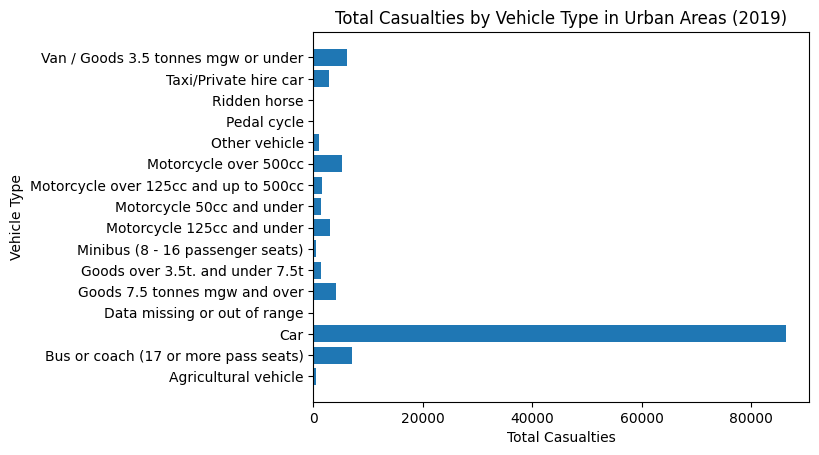

In [43]:
df_urban19 = df_exam3[df_exam3['Urban_or_Rural_Area'] == 'Urban']
urban_vehi = df_urban19.groupby('Vehicle_Type')['Number_of_Casualties'].sum()

plt.barh(urban_vehi.index, urban_vehi.values)
plt.ylabel("Vehicle Type")
plt.xlabel("Total Casualties")
plt.title("Total Casualties by Vehicle Type in Urban Areas (2019)")

plt.show()

<h1>Insight 6</h1>
<h3>the vehicle involve the most in accidents in the weather 'fine with no winds' in Rural areas in 2019 is  alsp Car  with 72.6% or 38468 involvement </h3>

C:\Users\RIZEN\AppData\Local\Temp\ipykernel_6936\2568093474.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  urban_vehi = df_Rural19.groupby('Vehicle_Type')['Number_of_Casualties'].sum()


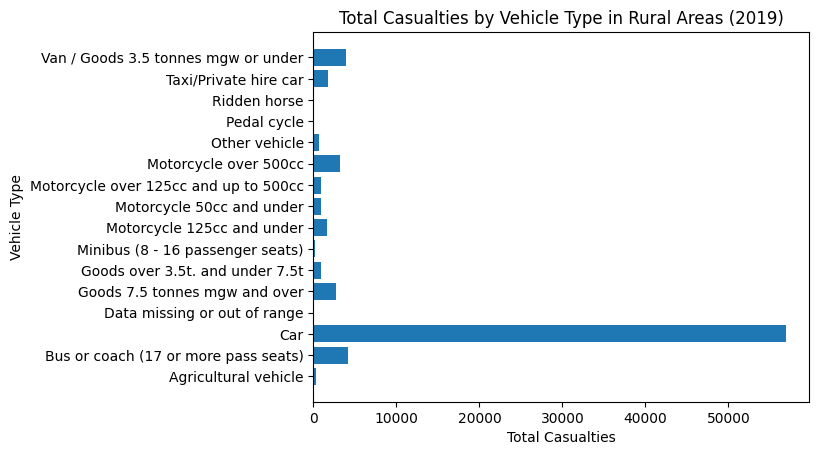

In [44]:
df_Rural19 = df_exam3[df_exam3['Urban_or_Rural_Area'] == 'Rural']
urban_vehi = df_Rural19.groupby('Vehicle_Type')['Number_of_Casualties'].sum()

plt.barh(urban_vehi.index, urban_vehi.values)
plt.ylabel("Vehicle Type")
plt.xlabel("Total Casualties")
plt.title("Total Casualties by Vehicle Type in Rural Areas (2019)")

plt.show()

In [45]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,,Year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,-0.209082,2019,6,5,2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,-0.173647,2019,7,2,1
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,-0.210215,2019,8,26,0
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),-0.202731,2019,8,16,4
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,Single carriageway,Urban,Fine no high winds,Other vehicle,-0.192487,2019,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,-3.467828,2022,2,18,4
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,-3.809281,2022,2,21,0
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,-3.862727,2022,2,23,2
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,-3.823997,2022,2,23,2


In [46]:
accident['Accident_Severity'].unique()

['Serious', 'Slight', 'Fatal']
Categories (3, object): ['Fatal', 'Serious', 'Slight']

In [47]:
df_exam5 = accident[accident['Accident_Severity'] == 'Fatal']

In [48]:
df_exam5

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,,Year,Month,Day,DayOfWeek
7,200701BS67370,Fatal,2019-10-03,51.482260,Darkness - lights lit,Kensington and Chelsea,-0.179486,3,2,Dry,Single carriageway,Urban,Fine no high winds,Car,-0.179486,2019,10,3,3
11,200701BS67747,Fatal,2019-11-02,51.499127,Daylight,Kensington and Chelsea,-0.159652,1,2,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),-0.159652,2019,11,2,5
20,200701BS68301,Fatal,2019-10-24,51.505996,Daylight,Kensington and Chelsea,-0.214277,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,-0.214277,2019,10,24,3
21,200701BS68302,Fatal,2019-11-24,51.486795,Daylight,Kensington and Chelsea,-0.170375,5,1,Dry,Single carriageway,Urban,Fine no high winds,Car,-0.170375,2019,11,24,6
717,200701CP00032,Fatal,2019-01-30,51.510978,Daylight,City of London,-0.107581,1,2,Wet or damp,Dual carriageway,Urban,Fine no high winds,Car,-0.107581,2019,1,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660470,201091NH00529,Fatal,2022-01-29,58.475726,Daylight,Western Isles,-6.278583,1,1,Wet or damp,Single carriageway,Rural,Fine + high winds,Car,-6.278583,2022,1,29,5
660519,201091NJ01533,Fatal,2022-02-02,58.495554,Daylight,Highland,-4.451628,1,1,Snow,Single carriageway,Rural,Snowing no high winds,Car,-4.451628,2022,2,2,2
660565,201091NJ11329,Fatal,2022-08-15,57.871514,Daylight,Highland,-4.243081,1,1,Dry,Single carriageway,Rural,Fine no high winds,Goods 7.5 tonnes mgw and over,-4.243081,2022,8,15,0
660581,201091NJ14695,Fatal,2022-10-21,58.445475,Darkness - lights lit,Highland,-3.065535,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,-3.065535,2022,10,21,4


In [49]:
df_exam6 = df_exam5.groupby(['Light_Conditions'])['Number_of_Casualties'].sum()

C:\Users\RIZEN\AppData\Local\Temp\ipykernel_6936\4028298760.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_exam6 = df_exam5.groupby(['Light_Conditions'])['Number_of_Casualties'].sum()


In [50]:
df_exam5['Number_of_Casualties'].sum()
# total number of Accident_Severity = fatal

16483

In [51]:
df_exam6
#Accident_Severity = fatal

Light_Conditions
Darkness - lighting unknown     114
Darkness - lights lit          3421
Darkness - lights unlit          76
Darkness - no lighting         3362
Daylight                       9510
Name: Number_of_Casualties, dtype: int64

In [52]:
df_exam5.groupby(['Light_Conditions', 'Road_Surface_Conditions']).size()


C:\Users\RIZEN\AppData\Local\Temp\ipykernel_6936\2498991274.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_exam5.groupby(['Light_Conditions', 'Road_Surface_Conditions']).size()


Light_Conditions             Road_Surface_Conditions
Darkness - lighting unknown  Dry                          43
                             Flood over 3cm. deep          1
                             Frost or ice                  1
                             Snow                          0
                             Wet or damp                  23
Darkness - lights lit        Dry                        1076
                             Flood over 3cm. deep          5
                             Frost or ice                 43
                             Snow                          5
                             Wet or damp                 731
Darkness - lights unlit      Dry                          26
                             Flood over 3cm. deep          1
                             Frost or ice                  0
                             Snow                          0
                             Wet or damp                  18
Darkness - no lighting       Dry

<h1>Insight 7</h1>
<h3> Accident_Severity = fatal also more happening in day time with 57.69% or 9510 out of 16483</h3>

C:\Users\RIZEN\AppData\Local\Temp\ipykernel_6936\4143145058.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_exam6 = fatal_all.groupby(['Light_Conditions'])['Number_of_Casualties'].sum()


Text(0.5, 1.0, 'number of casualty in light_condtion')

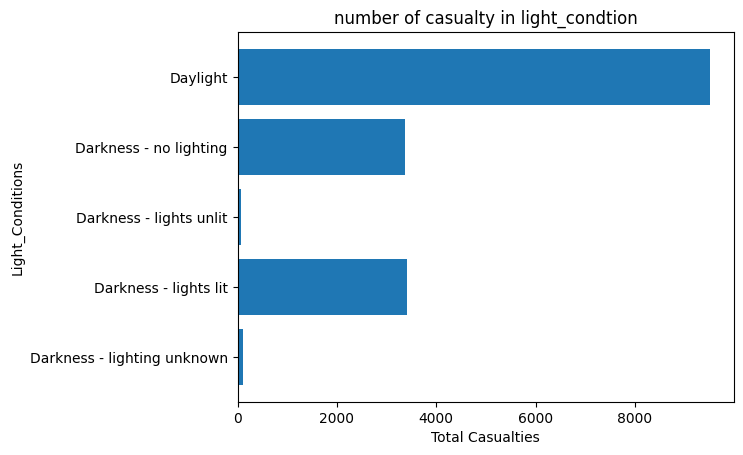

In [53]:
fatal_all = accident[accident['Accident_Severity'] == 'Fatal']
df_exam6 = fatal_all.groupby(['Light_Conditions'])['Number_of_Casualties'].sum()

plt.barh(df_exam6.index, df_exam6.values)
plt.ylabel("Light_Conditions")
plt.xlabel("Total Casualties")
plt.title("number of casualty in light_condtion")


In [54]:
df_exam7 = df_exam5.groupby(['Light_Conditions','Road_Surface_Conditions'])['Number_of_Casualties'].sum()

C:\Users\RIZEN\AppData\Local\Temp\ipykernel_6936\2929783886.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_exam7 = df_exam5.groupby(['Light_Conditions','Road_Surface_Conditions'])['Number_of_Casualties'].sum()


In [55]:
df_exam7.unstack()

Road_Surface_Conditions,Dry,Flood over 3cm. deep,Frost or ice,Snow,Wet or damp
Light_Conditions,,,,,
Darkness - lighting unknown,71,3,3,0,37
Darkness - lights lit,1940,13,97,10,1361
Darkness - lights unlit,43,5,0,0,28
Darkness - no lighting,1696,10,173,19,1464
Daylight,6823,21,174,42,2450


In [56]:
df_exam7['Daylight'].sum()

9510

<h1>Insight 8</h1>
<h3> Accident_Severity that are fatal more happening in day time and dry condition with 43.81%</h3>

C:\Users\RIZEN\AppData\Local\Temp\ipykernel_6936\4207507285.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_exam6 = fatal_all.groupby(['Light_Conditions', 'Road_Surface_Conditions']).size().unstack()


<Axes: xlabel='Light_Conditions'>

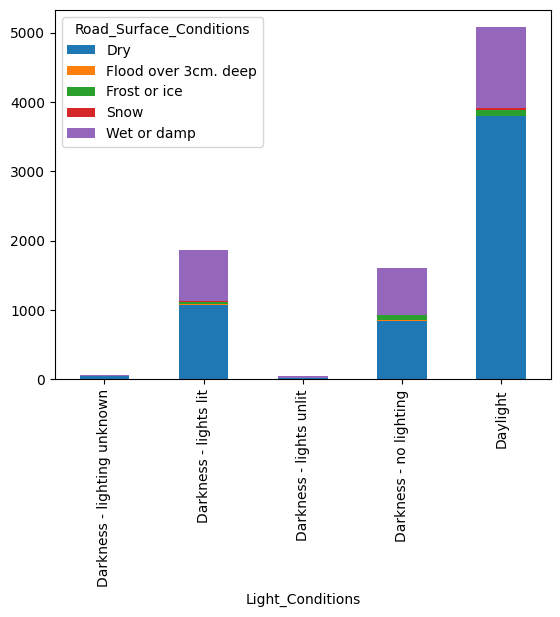

In [57]:
fatal_all = accident[accident['Accident_Severity'] == 'Fatal']
#df_exam5['Number_of_Casualties'].sum()
df_exam6 = fatal_all.groupby(['Light_Conditions', 'Road_Surface_Conditions']).size().unstack()

df_exam6.plot(kind = 'bar', stacked = True)


<h1>Insight 9</h1>
<h3> Accident_Severity that are  fatal are less happening when theres a Flood over 3cm. deep with only 0.26%</h3>

C:\Users\RIZEN\AppData\Local\Temp\ipykernel_6936\1861321698.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_exam6 = fatal_all.groupby(['Light_Conditions', 'Road_Surface_Conditions']).size().unstack()


<Axes: xlabel='Light_Conditions'>

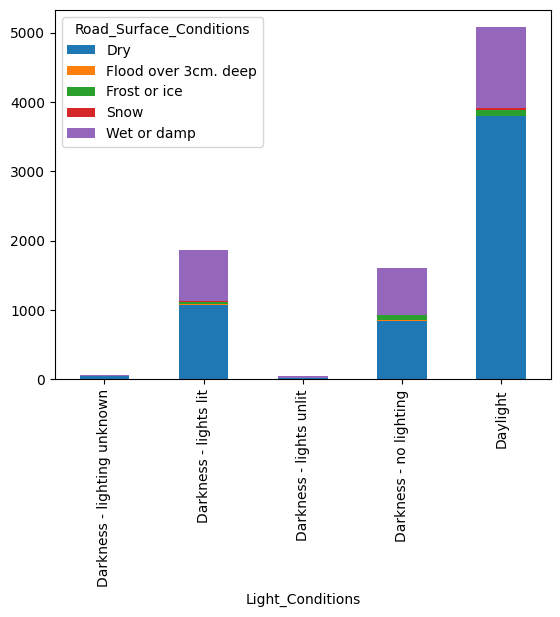

In [58]:
fatal_all = accident[accident['Accident_Severity'] == 'Fatal']
#df_exam5['Number_of_Casualties'].sum()
df_exam6 = fatal_all.groupby(['Light_Conditions', 'Road_Surface_Conditions']).size().unstack()

df_exam6.plot(kind = 'bar', stacked = True)

In [59]:
acci_20 = accident[accident['Year'] == 2020]

In [60]:
acci_20['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                     113716
Wet or damp              52076
Frost or ice              3870
Snow                       598
Flood over 3cm. deep       331
Name: count, dtype: int64

In [61]:
acci_20['Number_of_Casualties'].sum()

230905

<h1>Insight 10</h1>
<h3> The number of accident more happening in dry road type condition with 49.24% in 2020 </h3>

C:\Users\RIZEN\AppData\Local\Temp\ipykernel_6936\1209203362.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_exam6 = acci_20.groupby(['Light_Conditions', 'Number_of_Casualties']).size().unstack()


<Axes: xlabel='Light_Conditions'>

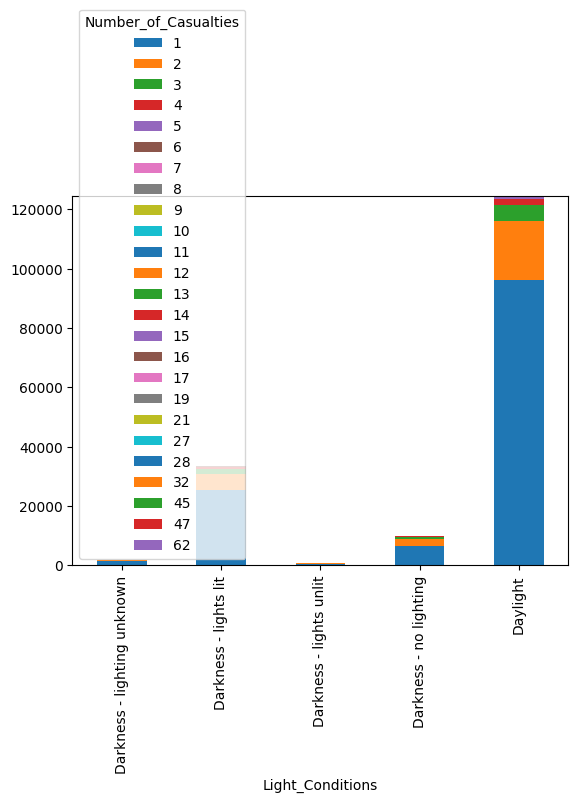

In [62]:
#acci_20 = accident[accident['Year'] == 2020]

df_exam6 = acci_20.groupby(['Light_Conditions', 'Number_of_Casualties']).size().unstack()



df_exam6.plot(kind = 'bar', stacked = True)

In [63]:
df_exam8 = acci_20.groupby(['Road_Surface_Conditions','Number_of_Vehicles'])['Number_of_Casualties'].sum()

C:\Users\RIZEN\AppData\Local\Temp\ipykernel_6936\683350287.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_exam8 = acci_20.groupby(['Road_Surface_Conditions','Number_of_Vehicles'])['Number_of_Casualties'].sum()


In [64]:
acci_20['Number_of_Vehicles'].sum()

311604

In [65]:
df_exam8.unstack()

Number_of_Vehicles,1,2,3,4,5,6,7,8,9,10,11,12,14,16
Road_Surface_Conditions,,,,,,,,,,,,,,
Dry,37975,93190,14764,3794,916,307,125,75,11,2,0,0,11,0
Flood over 3cm. deep,225,231,41,3,4,0,0,0,0,0,0,0,0,0
Frost or ice,2437,2320,340,80,25,9,2,11,1,5,0,0,0,17
Snow,344,358,68,34,3,3,9,0,0,6,0,0,3,0
Wet or damp,20234,42487,7718,1863,459,201,94,40,20,18,16,6,0,0


In [66]:
df_exam8['Dry'].sum()

151170

<h1>Insight 11</h1>
<h3> The number of casualty when the Number_of_Vehicles is 2 with 29.90% in dry road surface in 2020 </h3>

C:\Users\RIZEN\AppData\Local\Temp\ipykernel_6936\968336684.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  casualty2_dry = vehicle20_num.groupby(['Road_Surface_Conditions'])['Number_of_Casualties'].size()


<Axes: xlabel='Road_Surface_Conditions'>

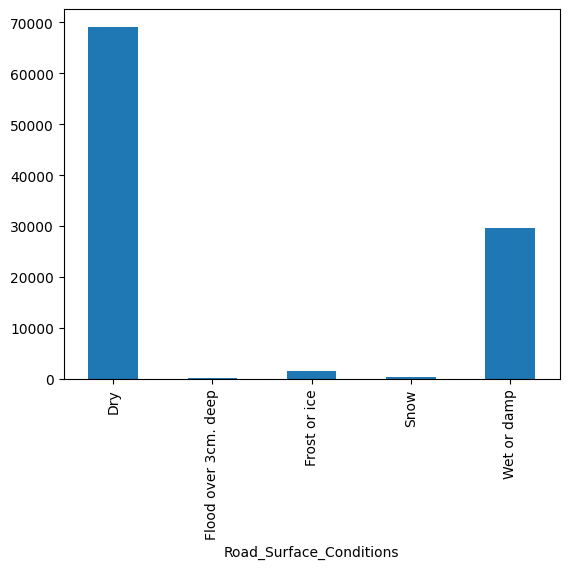

In [67]:
#casualty2_dry = acci_20.groupby(['Road_Surface_Conditions','Number_of_Vehicles']).size()
vehicle20_num = acci_20[acci_20['Number_of_Vehicles'] == 2]

casualty2_dry = vehicle20_num.groupby(['Road_Surface_Conditions'])['Number_of_Casualties'].size()
casualty2_dry.plot(kind='bar')

In [68]:
vehicle20_num

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,,Year,Month,Day,DayOfWeek
182119,200801BS69938,Serious,2020-02-27,51.493271,Darkness - lights lit,Kensington and Chelsea,-0.199504,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Motorcycle over 500cc,-0.199504,2020,2,27,3
182120,200801BS70001,Serious,2020-01-02,51.491521,Darkness - lights lit,Kensington and Chelsea,-0.179406,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,-0.179406,2020,1,2,3
182121,200801BS70002,Slight,2020-01-06,51.484909,Darkness - lights lit,Kensington and Chelsea,-0.176356,1,2,Wet or damp,Single carriageway,Urban,Fine no high winds,Motorcycle over 500cc,-0.176356,2020,1,6,0
182123,200801BS70004,Slight,2020-01-05,51.490631,Darkness - lights lit,Kensington and Chelsea,-0.185779,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,-0.185779,2020,1,5,6
182125,200801BS70006,Serious,2020-01-07,51.494069,Daylight,Kensington and Chelsea,-0.158271,1,2,Dry,Single carriageway,Urban,Fine no high winds,Goods over 3.5t. and under 7.5t,-0.158271,2020,1,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352692,2.01E+12,Slight,2020-10-30,55.115219,Daylight,Dumfries and Galloway,-3.147428,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,-3.147428,2020,10,30,4
352693,2.01E+12,Slight,2020-10-31,54.995756,Darkness - lights unlit,Dumfries and Galloway,-3.285018,1,2,Wet or damp,Single carriageway,Rural,Raining no high winds,Car,-3.285018,2020,10,31,5
352697,2.01E+12,Serious,2020-11-04,55.243971,Darkness - no lighting,Dumfries and Galloway,-3.461163,2,2,Dry,Single carriageway,Rural,Fine no high winds,Car,-3.461163,2020,11,4,2
352698,2.01E+12,Slight,2020-11-15,55.081838,Daylight,Dumfries and Galloway,-3.243129,3,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Other vehicle,-3.243129,2020,11,15,6


In [69]:
df_exam9 = acci_20[acci_20['Road_Surface_Conditions'] == 'Frost or ice']

In [70]:
df_exam9['Number_of_Casualties'].sum()


5247

<h1>Insight 12</h1>
<h3> The number of casualty in road surface condition frost or ice  in 2020 is 5247 that 2.27% of 230905(total casualy in 2020)</h3>

C:\Users\RIZEN\AppData\Local\Temp\ipykernel_6936\968336684.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  casualty2_dry = vehicle20_num.groupby(['Road_Surface_Conditions'])['Number_of_Casualties'].size()


<Axes: xlabel='Road_Surface_Conditions'>

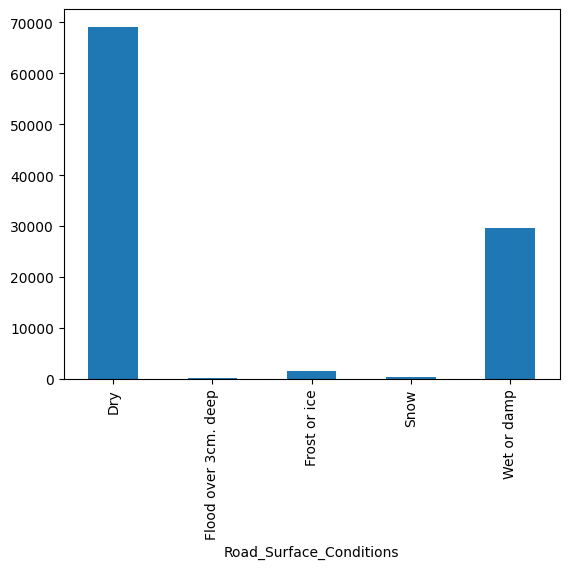

In [71]:
#casualty2_dry = acci_20.groupby(['Road_Surface_Conditions','Number_of_Vehicles']).size()
vehicle20_num = acci_20[acci_20['Number_of_Vehicles'] == 2]

casualty2_dry = vehicle20_num.groupby(['Road_Surface_Conditions'])['Number_of_Casualties'].size()
casualty2_dry.plot(kind='bar')

<h1>Insight 13</h1>
<h3>The number of casualty in Number_of_Vehicles 1 vehicle have more than 2 vehicle in road surface frost or ice. In 1 vehicle 46.44% and in 2 vehicle with 44.21%</h3>

<Axes: xlabel='Number_of_Vehicles'>

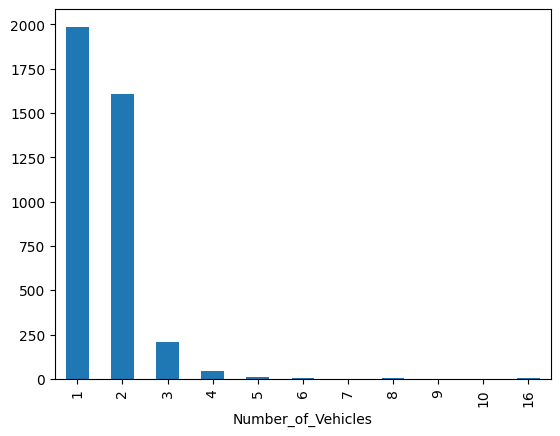

In [72]:
ice_vehicle = acci_20[acci_20['Road_Surface_Conditions'] == 'Frost or ice']

casualty_ice = ice_vehicle.groupby(['Number_of_Vehicles'])['Number_of_Casualties'].size()
casualty_ice.plot(kind = 'bar')

In [73]:
df_Exam10 =  acci_20.groupby(['Road_Surface_Conditions','Vehicle_Type'])['Number_of_Casualties'].sum()

C:\Users\RIZEN\AppData\Local\Temp\ipykernel_6936\1704661901.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_Exam10 =  acci_20.groupby(['Road_Surface_Conditions','Vehicle_Type'])['Number_of_Casualties'].sum()


In [74]:
df_Exam10.unstack()

Vehicle_Type,Agricultural vehicle,Bus or coach (17 or more pass seats),Car,Data missing or out of range,Goods 7.5 tonnes mgw and over,Goods over 3.5t. and under 7.5t,Minibus (8 - 16 passenger seats),Motorcycle 125cc and under,Motorcycle 50cc and under,Motorcycle over 125cc and up to 500cc,Motorcycle over 500cc,Other vehicle,Pedal cycle,Ridden horse,Taxi/Private hire car,Van / Goods 3.5 tonnes mgw or under
Road_Surface_Conditions,,,,,,,,,,,,,,,,
Dry,477,5972,113428,3,3982,1377,497,3549,1558,1676,6006,1401,63,0,3175,8006
Flood over 3cm. deep,7,21,366,0,12,0,0,8,6,7,31,12,0,0,6,28
Frost or ice,20,232,3937,2,112,53,10,129,53,67,192,65,5,0,130,240
Snow,2,39,615,0,31,5,5,20,12,9,30,6,0,0,17,37
Wet or damp,213,2952,54579,4,1939,683,219,1763,755,795,2964,626,19,0,1619,4026


In [75]:
horse_accident

NameError: name 'horse_accident' is not defined

<h1>Insight 14</h1>
<h3>There total accident using horse is only 4</h3>

C:\Users\RIZEN\AppData\Local\Temp\ipykernel_6936\1572821108.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  horse_accident = horse_vehicle.groupby(['Road_Surface_Conditions'])['Number_of_Casualties'].size()


<Axes: xlabel='Road_Surface_Conditions'>

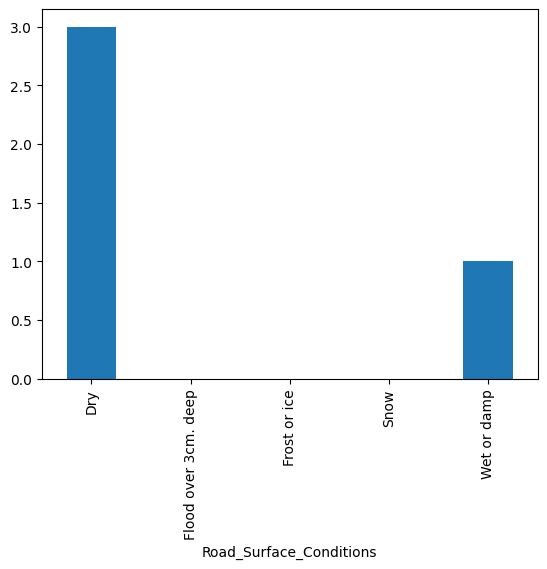

In [76]:
horse_vehicle = accident[accident['Vehicle_Type'] == 'Ridden horse']
horse_accident = horse_vehicle.groupby(['Road_Surface_Conditions'])['Number_of_Casualties'].size()
horse_accident.plot(kind='bar')


In [77]:
df_Exam11 =  acci_20.groupby(['Accident_Severity','Vehicle_Type'])['Number_of_Casualties'].sum()

C:\Users\RIZEN\AppData\Local\Temp\ipykernel_6936\474699759.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_Exam11 =  acci_20.groupby(['Accident_Severity','Vehicle_Type'])['Number_of_Casualties'].sum()


In [78]:
df_Exam11.unstack()

Vehicle_Type,Agricultural vehicle,Bus or coach (17 or more pass seats),Car,Data missing or out of range,Goods 7.5 tonnes mgw and over,Goods over 3.5t. and under 7.5t,Minibus (8 - 16 passenger seats),Motorcycle 125cc and under,Motorcycle 50cc and under,Motorcycle over 125cc and up to 500cc,Motorcycle over 500cc,Other vehicle,Pedal cycle,Ridden horse,Taxi/Private hire car,Van / Goods 3.5 tonnes mgw or under
Accident_Severity,,,,,,,,,,,,,,,,
Fatal,8,250,3263,0,113,38,18,74,38,38,170,38,3,0,111,236
Serious,92,1245,25621,0,906,339,102,788,347,353,1321,302,22,0,746,1803
Slight,619,7721,144041,9,5057,1741,611,4607,1999,2163,7732,1770,62,0,4090,10298


In [79]:
accident['Day'].unique()

array([ 5,  2, 26, 16,  3, 18, 31,  9, 12,  8,  1, 19, 10, 20, 24, 22, 17,
        6, 13,  7, 15, 14,  4, 28, 27, 25, 30, 11, 21, 23, 29])

In [80]:
severiry20_vehicle =  acci_20.groupby(['Accident_Severity','Vehicle_Type']).size().reset_index(name='Accident_Count')


severiry20_vehicle


C:\Users\RIZEN\AppData\Local\Temp\ipykernel_6936\2884144982.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  severiry20_vehicle =  acci_20.groupby(['Accident_Severity','Vehicle_Type']).size().reset_index(name='Accident_Count')


,Accident_Severity,Vehicle_Type,Accident_Count
0,Fatal,Agricultural vehicle,7
1,Fatal,Bus or coach (17 or more pass seats),91
2,Fatal,Car,1772
3,Fatal,Data missing or out of range,0
4,Fatal,Goods 7.5 tonnes mgw and over,52
5,Fatal,Goods over 3.5t. and under 7.5t,15
6,Fatal,Minibus (8 - 16 passenger seats),9
7,Fatal,Motorcycle 125cc and under,41
8,Fatal,Motorcycle 50cc and under,24
9,Fatal,Motorcycle over 125cc and up to 500cc,22


<h1>Insight 15</h1>
<h3>In all accident_severity(fatal, serious, slight) the vehicle car have the most number of people involve</h3>

C:\Users\RIZEN\AppData\Local\Temp\ipykernel_6936\3347492250.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  severiry20_vehicle = acci_20.groupby(['Accident_Severity', 'Vehicle_Type']).size().reset_index(name='Accident_Count')


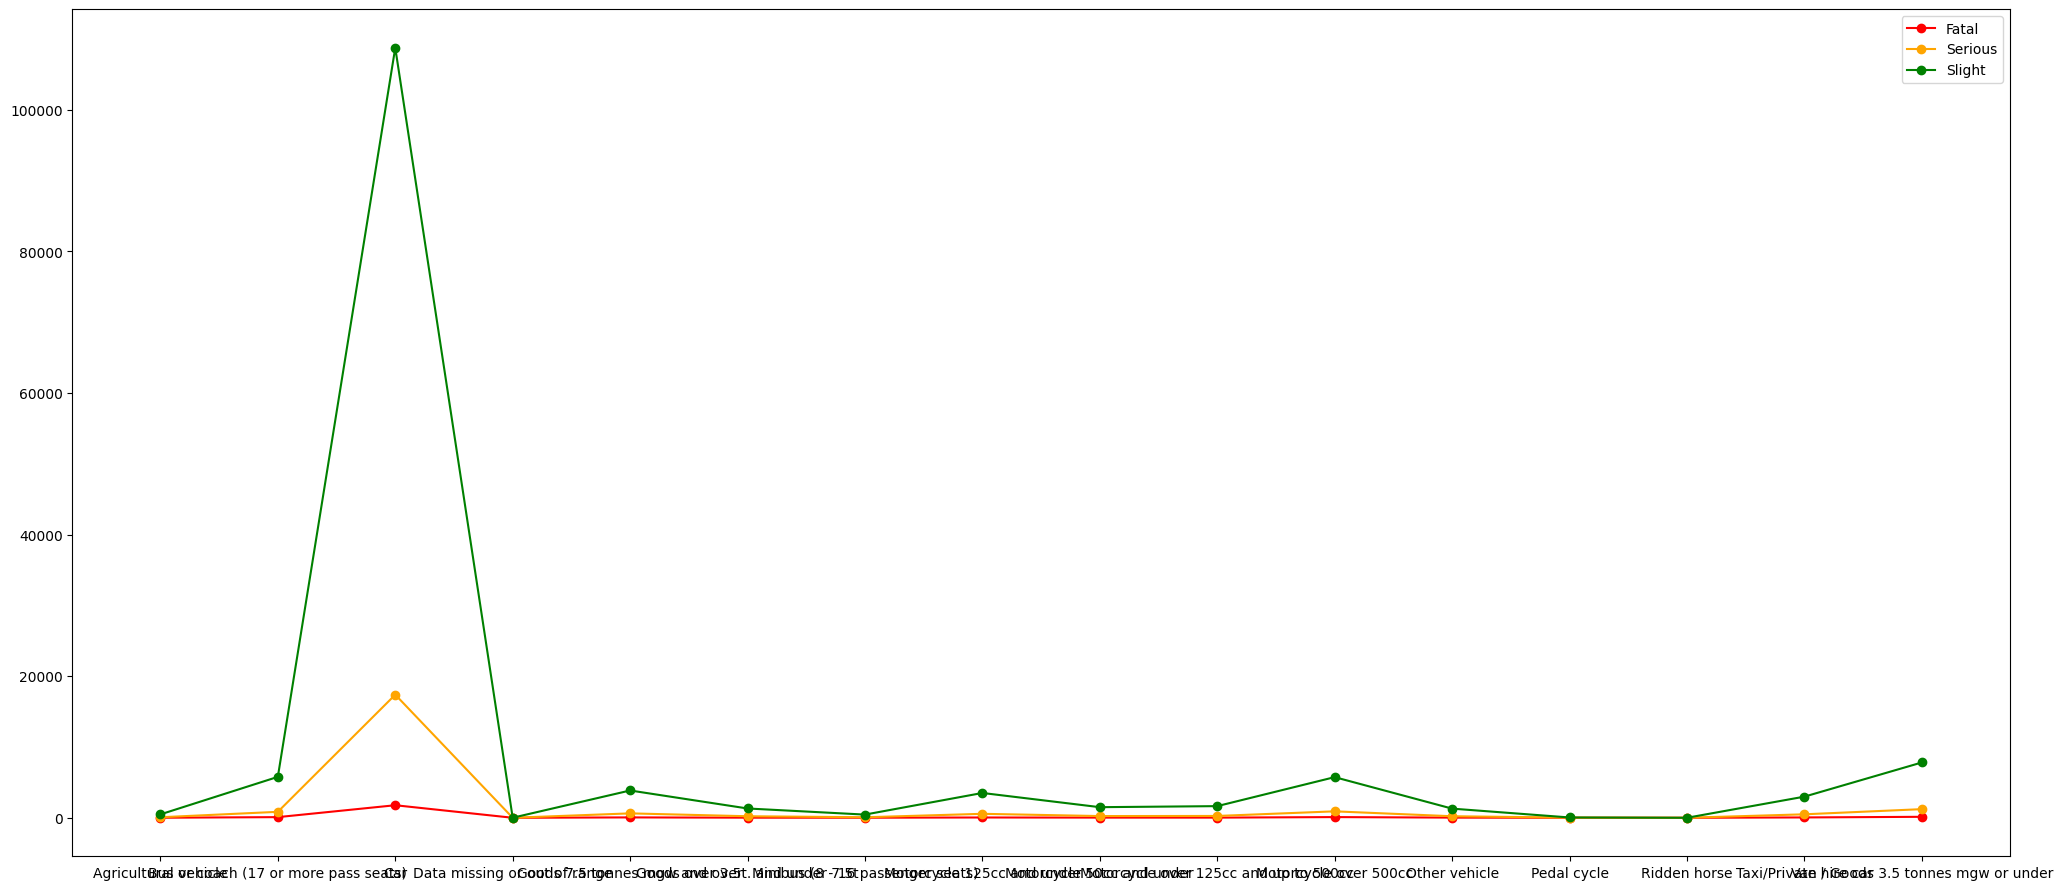

In [99]:

severiry20_vehicle = acci_20.groupby(['Accident_Severity', 'Vehicle_Type']).size().reset_index(name='Accident_Count')

pivot1 = severiry20_vehicle.pivot(index='Vehicle_Type', columns='Accident_Severity', values='Accident_Count').reset_index()

vehicle_names = {
    0: 'A_vehicle', 1: 'Bus', 2: 'Car', 3: 'missing', 4: '7.5 tons', 5: '3.5t', 
    6: 'Minibus', 7: 'Motorcycle 125cc', 8: 'Motorcycle 50cc', 
    9: 'Motorcycle over 125cc', 10: 'Motorcycle over 500cc',
    11: 'Other', 12: 'Pedal cycle', 13: 'Horse', 14: 'Taxi', 15: 'Van'
}

# Apply numeric renaming
pivot1.index = pivot1.index.map(vehicle_names)

# Plotting
plt.figure(figsize=(25, 11))
plt.plot(pivot1['Vehicle_Type'], pivot1['Fatal'], label='Fatal', marker='o', color='red')
plt.plot(pivot1['Vehicle_Type'], pivot1['Serious'], label='Serious', marker='o', color='orange')
plt.plot(pivot1['Vehicle_Type'], pivot1['Slight'], label='Slight', marker='o', color='green')

plt.legend()
plt.show()





In [ ]:
data = acci_20.groupby(['Month'])['Number_of_Casualties'].sum()


In [ ]:
acci_20.groupby('Month')['Number_of_Casualties'].sum().sum()


In [ ]:
data

<h1>Insight 16</h1>
<h3>October has the highest number of casualties in 2020 with 9.10%</h3>

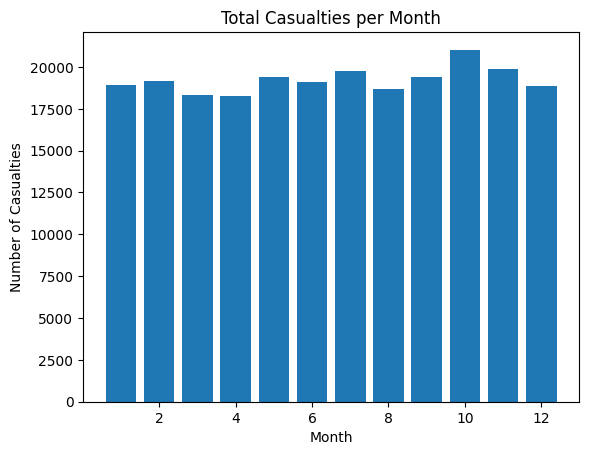

In [100]:
data = acci_20.groupby(['Month'])['Number_of_Casualties'].sum()


plt.bar(data.index, data.values)


plt.xlabel('Month')
plt.ylabel('Number of Casualties')
plt.title('Total Casualties per Month')

plt.show()

In [ ]:
data = acci_20.groupby(['Month'])['Number_of_Casualties'].size()

data

In [ ]:
data.min()

In [ ]:
data.max()

In [ ]:
acci_20['Number_of_Casualties'].value_counts().sum()

<h1>Insight 17</h1>
<h3>Also in October have the highest accident rate  in 2020 with 9.19%</h3>

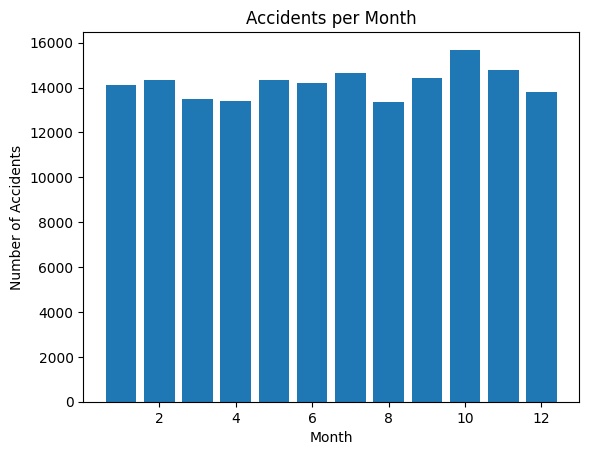

In [101]:
data = acci_20.groupby(['Month'])['Number_of_Casualties'].size()


plt.bar(data.index, data.values)

plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.title('Accidents per Month')

plt.show()

<h1>Insight 18</h1>
<h3>The accident rate are ranging from 13300 - 15700 in year 2020</h3>

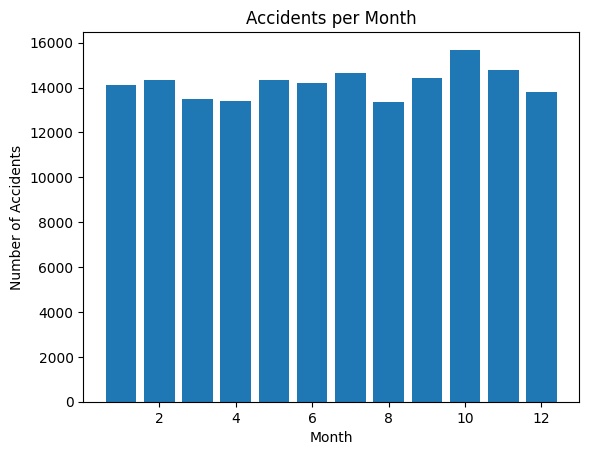

In [102]:
data = acci_20.groupby(['Month'])['Number_of_Casualties'].size()


plt.bar(data.index, data.values)


plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.title('Accidents per Month')

plt.show()

In [ ]:
correlation1 = accident['Number_of_Vehicles'].corr(accident['Number_of_Casualties'])

print(correlation1)

In [ ]:
accident['Number_of_Vehicles'].value_counts()

In [ ]:
accident['Number_of_Vehicles'].value_counts().sum()

<h1>Insight 20</h1>
<h3>Most accident involve 2 vehicle with 59.24%</h3>

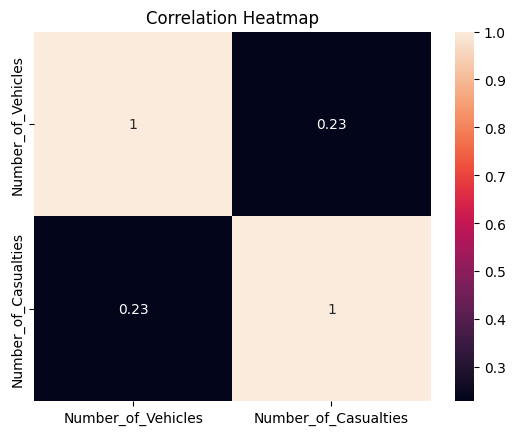

In [105]:
correlation_matrix = accident[['Number_of_Vehicles', 'Number_of_Casualties']].corr()
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Heatmap')

plt.show()